TASK-01 STUDENT PASS/FAIL PREDICTION

In [3]:
import pandas as pd
data = pd.read_csv('/content/student_exam_data.csv')
print(data.head())


   Study Hours  Previous Exam Score  Pass/Fail  Attendance
0     4.370861            81.889703          0          76
1     9.556429            72.165782          1          76
2     7.587945            58.571657          0          76
3     6.387926            88.827701          1          76
4     2.404168            81.083870          0          76


In [5]:
# Check for missing values
print(data.isnull().sum())
print(data.describe())





Study Hours            0
Previous Exam Score    0
Pass/Fail              0
Attendance             0
dtype: int64
       Study Hours  Previous Exam Score   Pass/Fail  Attendance
count   500.000000           500.000000  500.000000   500.00000
mean      5.487055            68.917084    0.368000    88.65200
std       2.688196            17.129607    0.482744     3.64877
min       1.045554            40.277921    0.000000    67.00000
25%       3.171517            53.745955    0.000000    90.00000
50%       5.618474            68.309294    0.000000    90.00000
75%       7.805124            83.580209    1.000000    90.00000
max       9.936683            99.983060    1.000000    90.00000


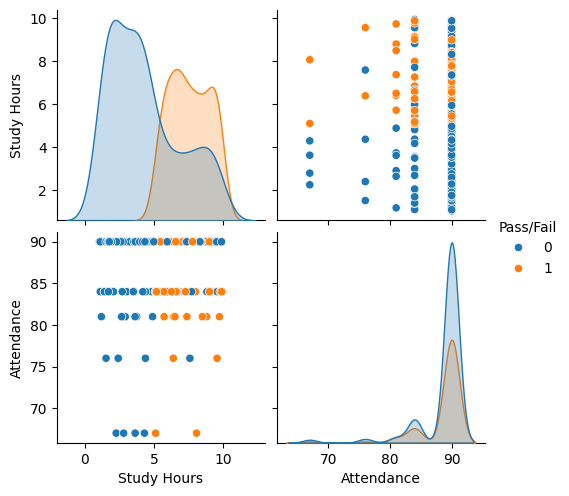

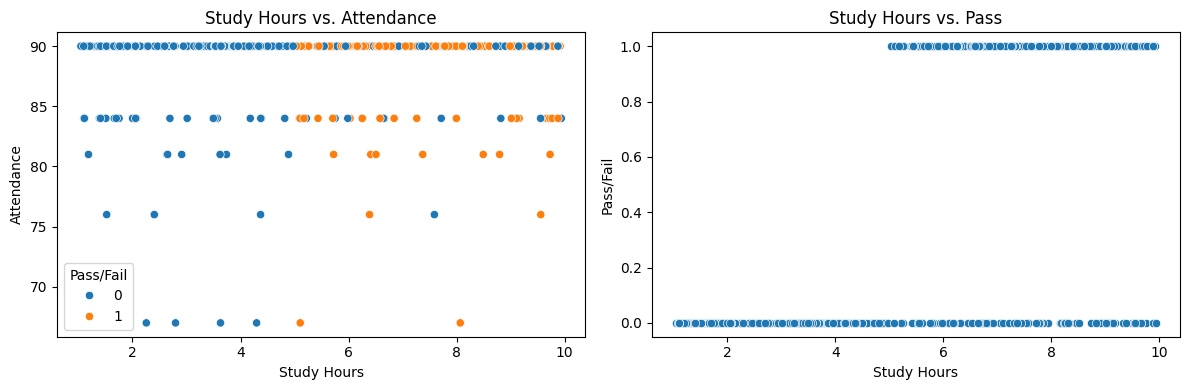

In [10]:
#the relationship between Study Hours, Attendance, and Pass/Fail
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, vars=['Study Hours', 'Attendance'], hue='Pass/Fail')
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass/Fail', data=data)
plt.title('Study Hours vs. Attendance')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Study Hours', y='Pass/Fail', data=data)
plt.title('Study Hours vs. Pass')

plt.tight_layout()
plt.show()


In [12]:
#Logistic Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data[['Study Hours', 'Attendance']]
y = data['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.75


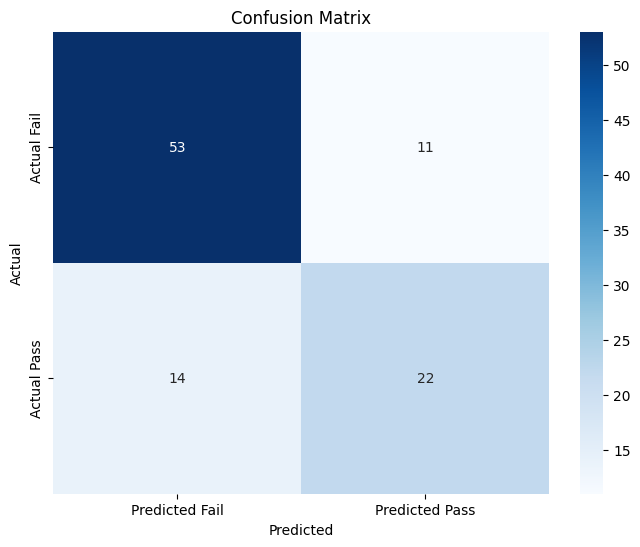

True Positives (TP): 22
True Negatives (TN): 53
False Positives (FP): 11
False Negatives (FN): 14


In [14]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

Key Performance indicators: Attendance and Study Hours

Task 2: Sentiment Analysis with Natural Language Processing

In [2]:
import pandas as pd
data = pd.read_csv('/content/IMDB-Dataset.csv')
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
#PREPROCESSING
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

data['review'] = data['review'].apply(clean_text)
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


In [4]:
#PREPROCESSING
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

data['review'] = data['review'].apply(lemmatize_text)
print(data.head())





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              review sentiment
0  one reviewer mentioned watching 1 oz episode y...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically there family little boy jake think t...  negative
4  petter matteis love time money visually stunni...  positive


In [5]:
#Converting text to numerical format using TF-IDF (Term Frequency-Inverse


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['review'])

print(tfidf_matrix.shape)

feature_names = vectorizer.get_feature_names_out()
print(feature_names)





(50000, 169379)
['00' '000' '0000000000001' ... 'þór' 'יגאל' 'כרמון']


Accuracy of the Logistic Regression model: 0.8962


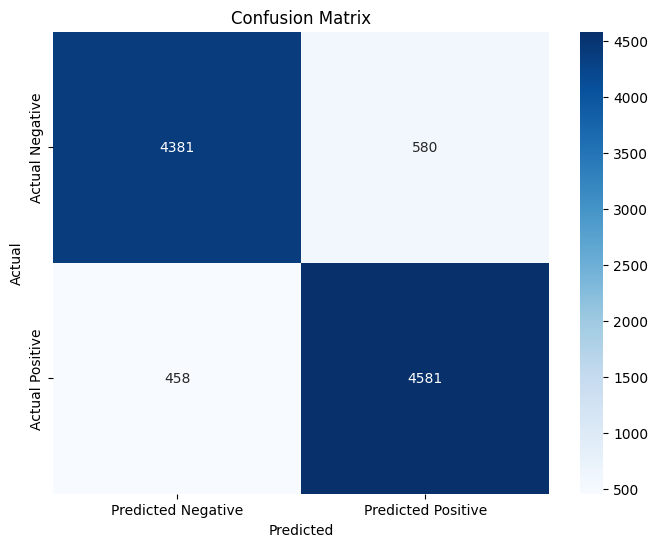

True Positives (TP): 4581
True Negatives (TN): 4381
False Positives (FP): 580
False Negatives (FN): 458


In [7]:
#Logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['sentiment'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")



In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_sentiment = precision_score(y_test, y_pred, pos_label='positive')
recall_sentiment = recall_score(y_test, y_pred, pos_label='positive')
f1_sentiment = f1_score(y_test, y_pred, pos_label='positive')

print(f"Precision for Sentiment Analysis: {precision_sentiment}")
print(f"Recall for Sentiment Analysis: {recall_sentiment}")
print(f"F1-score for Sentiment Analysis: {f1_sentiment}")

Precision for Sentiment Analysis: 0.8876186785506684
Recall for Sentiment Analysis: 0.9091089501885294
F1-score for Sentiment Analysis: 0.898235294117647
